In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')

if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("this happened")

this happened


In [2]:
import os
from getDataFunctions import getStareData, getRFMIDData, getODIRData
IMAGE_SIZE = (512,512)

In [3]:
#Get All Data
stare_AMD_w_others_data, stare_normal_data = getStareData(IMAGE_SIZE)
RFMiD_Pure_AMD_data, RFMiD_AMD_w_others_data, RFMiD_normal_data = getRFMIDData(IMAGE_SIZE)
ODIR_Pure_AMD_data, ODIR_AMD_w_others_data, ODIR_normal_data = getODIRData(IMAGE_SIZE)


In [4]:
print(ODIR_Pure_AMD_data.shape)

(258, 512, 512, 1)


## U-NET predict Data

In [5]:
from keras_unet.models import custom_unet

input_shape = stare_AMD_w_others_data[0].shape

model = custom_unet(
    input_shape,
    filters=32,
    use_batch_norm=True,
    dropout=0.3,
    dropout_change_per_layer=0.0,
    num_layers=4
)


-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 32  288         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [7]:
from keras.optimizers import Adam, SGD
from keras_unet.metrics import iou, iou_thresholded
from tensorflow.keras.metrics import Recall, Precision
from metrics import dice_loss, dice_coef, iou
from tensorflow import keras

loss = keras.losses.BinaryCrossentropy()
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=loss,
    metrics=["accuracy", dice_coef, iou, Recall(), Precision()],
)

In [8]:
##load model
model_filename = 'pure_amd_model_v1.h5'

if(os.path.exists(model_filename)):
    model.load_weights(model_filename)


In [9]:
import tensorflow as tf

##predict function
def predict(data):
    with tf.device('GPU'): 
        result = model.predict(data)
        
    return result

## Prediction

In [10]:
stare_AMD_w_others_pred = predict(stare_AMD_w_others_data)
stare_normal_pred = predict(stare_normal_data)
RFMiD_Pure_AMD_pred = predict(RFMiD_Pure_AMD_data)
RFMiD_AMD_w_others_pred = predict(RFMiD_AMD_w_others_data)
RFMiD_normal_pred = predict(RFMiD_normal_data)
ODIR_Pure_AMD_pred = predict(ODIR_Pure_AMD_data)
ODIR_AMD_w_others_pred = predict(ODIR_AMD_w_others_data)
#ODIR_normal_pred = predict(ODIR_normal_data)

3/3 [==============================] - 6s 3s/step


In [11]:
# Saving Data
import pickle

folder = 'pure_amd_pickled'

pickle_stare_AMD_w_others_pred = open(folder+"/"+"stare_AMD_w_others_pred.pickle","wb")
pickle.dump(stare_AMD_w_others_pred, pickle_stare_AMD_w_others_pred)
pickle_stare_AMD_w_others_pred.close()

pickle_stare_normal_pred = open(folder+"/"+"stare_normal_pred.pickle","wb")
pickle.dump(stare_normal_pred, pickle_stare_normal_pred)
pickle_stare_normal_pred.close()

pickle_RFMiD_Pure_AMD_pred = open(folder+"/"+"RFMiD_Pure_AMD_pred.pickle","wb")
pickle.dump(RFMiD_Pure_AMD_pred, pickle_RFMiD_Pure_AMD_pred)
pickle_RFMiD_Pure_AMD_pred.close()

pickle_RFMiD_AMD_w_others_pred = open(folder+"/"+"RFMiD_AMD_w_others_pred.pickle","wb")
pickle.dump(RFMiD_AMD_w_others_pred, pickle_RFMiD_AMD_w_others_pred)
pickle_RFMiD_AMD_w_others_pred.close()

pickle_RFMiD_normal_pred = open(folder+"/"+"RFMiD_normal_pred.pickle","wb")
pickle.dump(RFMiD_normal_pred, pickle_RFMiD_normal_pred)
pickle_RFMiD_normal_pred.close()

pickle_ODIR_Pure_AMD_pred = open(folder+"/"+"ODIR_Pure_AMD_pred.pickle","wb")
pickle.dump(ODIR_Pure_AMD_pred, pickle_ODIR_Pure_AMD_pred)
pickle_ODIR_Pure_AMD_pred.close()

pickle_ODIR_AMD_w_others_pred = open(folder+"/"+"ODIR_AMD_w_others_pred.pickle","wb")
pickle.dump(ODIR_AMD_w_others_pred, pickle_ODIR_AMD_w_others_pred)
pickle_ODIR_AMD_w_others_pred.close()

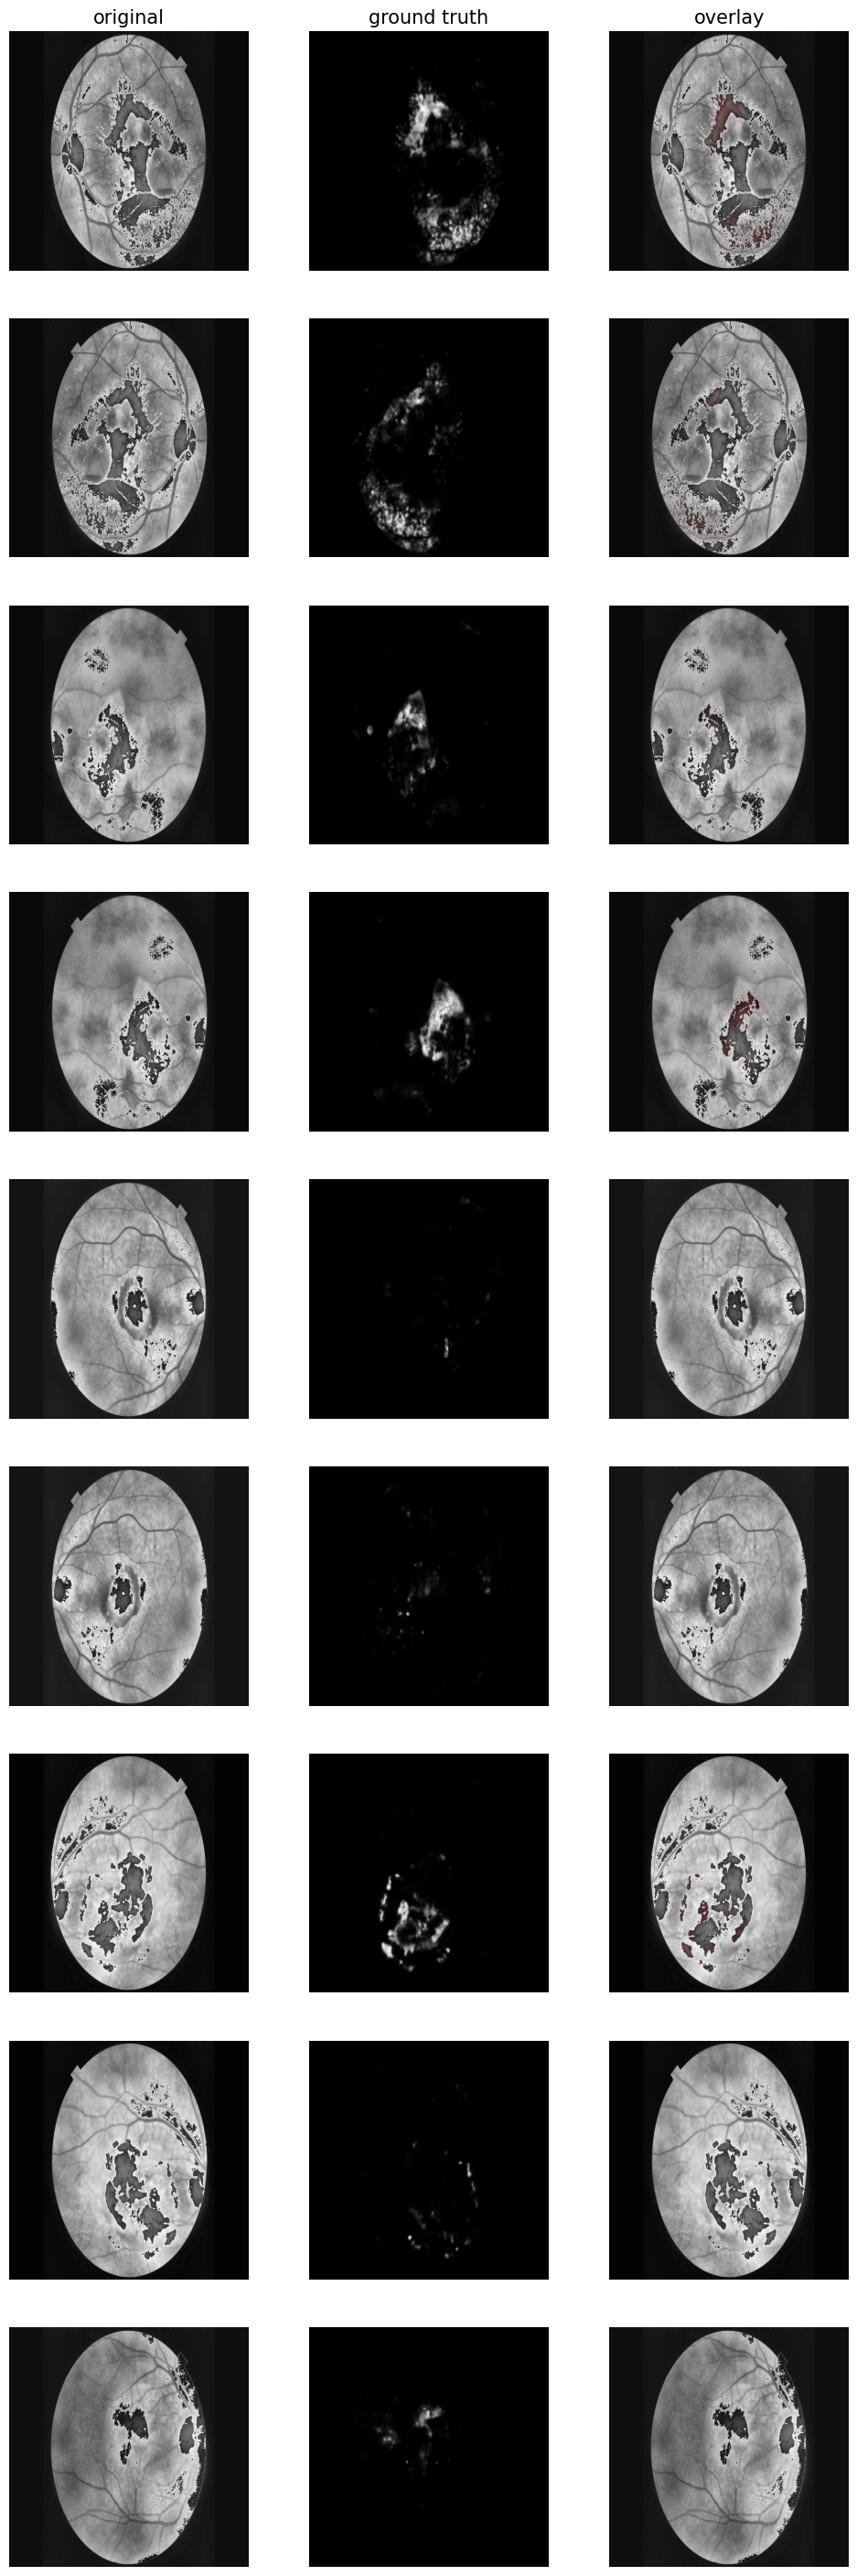

In [12]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=RFMiD_Pure_AMD_data, mask_imgs=RFMiD_Pure_AMD_pred, nm_img_to_plot=9, figsize=4)